# Using the TFA toolbox

   Imports:

In [1]:
import datetime as dt
import swarmpal.toolboxes.tfa.tfa_processor as tfa

Provide values for the parameters of the analysis.  The `dataset` can be chosen from one of the compatible magnetic data collections, and the `var` is a VirES-compatible variable string (see [viresclient](https://viresclient.readthedocs.io/en/latest/available_parameters.html) for more information). The "start" and "end" times must be given as a datetime object. If the data are required as they are, set the `remove_chaos_model` parameter to False. Otherwise, if the inputs are magnetic field data and the analysis requires subtraction of the model field, set the parameter to True. 
For the electric field, the `SW_EXPT_EFIA_TCT02` has to be used, which includes electric field measurements from the VxB product, in two directions, "horizonta" or "vertical", both in the instrument XYZ cartesian coordinate frame. Each of these can be selected with the `Eh_XYV` or `Ev_XYZ` variables.

In [2]:
dataset = "SW_EXPT_EFIA_TCT02"
series_dt = "PT1S"
var = 'Eh_XYZ'
remove_chaos_model = False
time_start = dt.datetime(2015, 3, 14, 12, 5, 0)
time_end = dt.datetime(2015, 3, 14, 12, 30, 0)

Now run the TfaInput to retrieve the selected data.

In [3]:
inputs = tfa.TfaInput(collection = dataset, 
                start_time = time_start, end_time = time_end,
                initialise = True,
                varname=var, sampling_time = series_dt,
                remove_chaos=remove_chaos_model)

Processing:    0%|          |  [ Elapsed: 00:00, Remaining: ? ] [1/1] 

Downloading:   0%|          |  [ Elapsed: 00:00, Remaining: ? ] (1.627MB)

Note: This is a dataset that is not yet supported officialy by SwarmPAL. The TFA bypasses that, by calling the ViresClient directly, behind the scenes, in order to get the data and then formats them so that they become of similar type with the other commonly used products. This will be updated soon, to be correctly supported through the normal channels.

Now that the input instance is ready, we can proceed to for Wavelet processing by initiating the `TfaProcessor` object and specifying the name of the variable and the component of choice, 0 for X, 1 for Y and 2 for the Z one.

In [4]:
processor = tfa.TfaProcessor(inputs, active_variable={"varname": "Eh_XYZ", "component": 0})

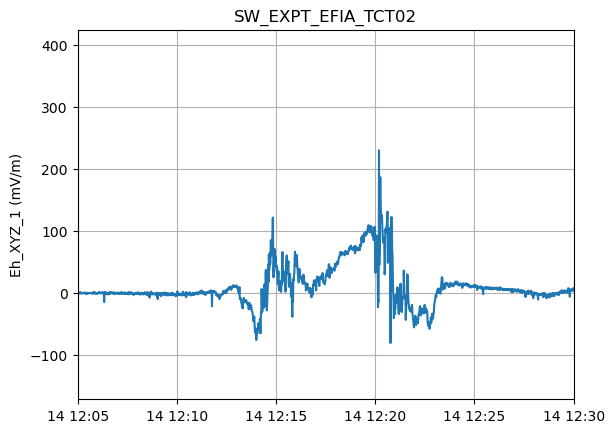

In [5]:
processor.plotX()

To perform cleaning on the data, we initialize a `Cleaning` object with the parameters of our choice and then apply it on the data with the `TfaProcessor` `apply()` function.
The active variable series can be plotted by means of the `plotX()` function.

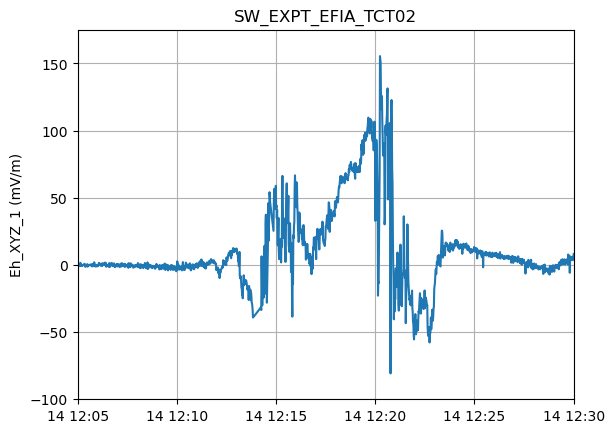

In [6]:
c = tfa.Cleaning({"Window_Size": 300, "Method": "iqr", "Multiplier": 1})
processor.apply(c)
processor.plotX()

Similarly, the filtering can be performed by first initializing a `Filtering` object with the parameters of our choosing and the applying in on the data.

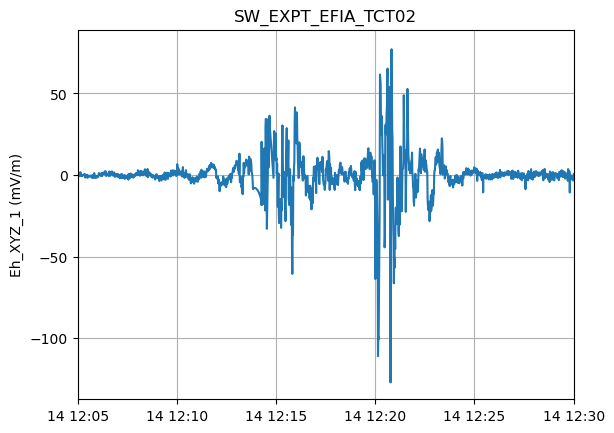

In [7]:
f = tfa.Filtering({"Sampling_Rate": 1/processor.input_data.SAMPLING_TIME, "Cutoff": 10/1000})
processor.apply(f)
processor.plotX()

In the same way, the wavelet transform is applied. The result of the wavelet can be visualized by means of the image() function

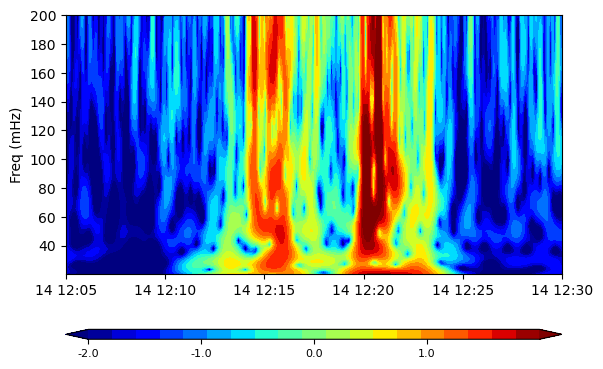

In [8]:
w = tfa.Wavelet({'Time_Step': processor.input_data.SAMPLING_TIME, 'Min_Scale': 1000/200, 'Max_Scale': 1000/20, 'dj': 0.1})
processor.apply(w)
processor.image(cbar_lims=[-2, 2])